# Histograms

### Graycale Histograms

### Color Histograms

### Histogram Equalization

### histograms and masks

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

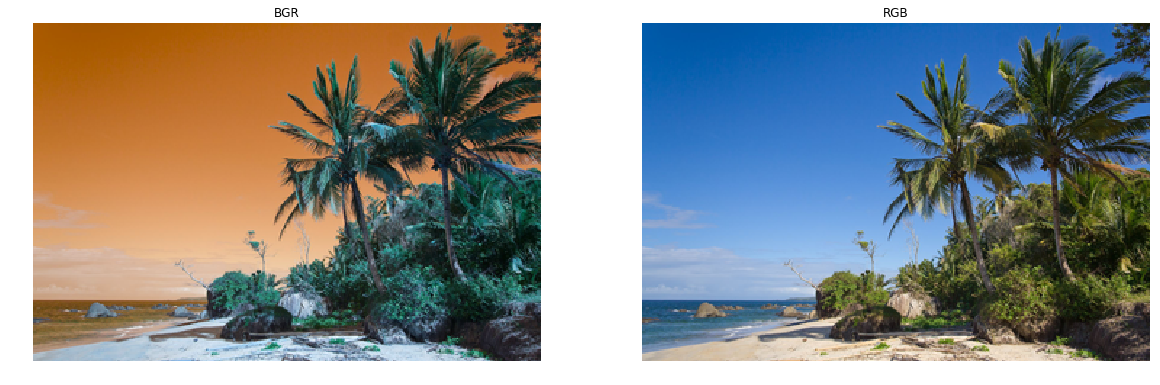

In [2]:
img = cv2.imread('images/beach.png')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



plt.figure(figsize=(20,10))

plt.subplot(1,2,1), plt.imshow(img)
plt.title('BGR'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(img2)
plt.title('RGB'),plt.axis("off")

plt.show()

### Grayscale Histograms

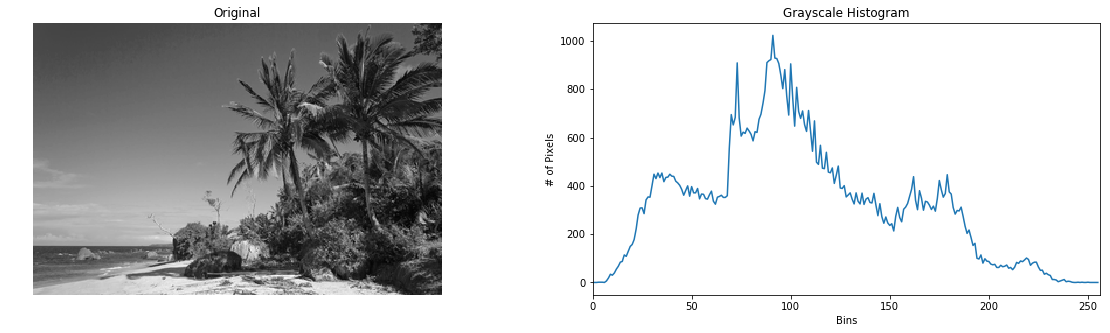

In [3]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# plt.imshow(img)
# plt.axis("off")
# plt.show()

hist = cv2.calcHist([img], [0], None, [256], [0,256])


plt.figure(figsize=(20,5))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2)
plt.title("Grayscale Histogram")
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
plt.plot(hist)
plt.xlim([0,256])
plt.show()

### Color Histogram

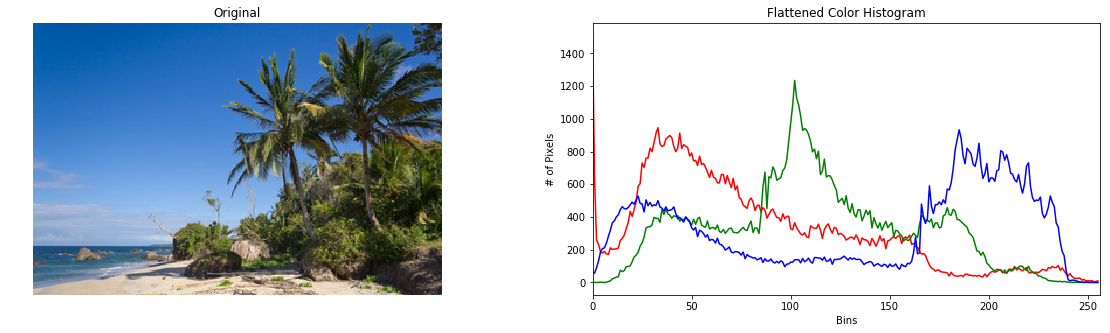

In [4]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

chans = cv2.split(img)
colors = ('r', 'g','b')

#hist = cv2.calcHist([img], [0], None, [256], [0,256])

# for(chan, color) in zip(chans, colors):
#     hist = cv2.calcHist([chan], [0], None, [256], [0,256])
#     plt.plot(hist,color = color)
#     plt.xlim([0,256])


plt.figure(figsize=(20,5))

plt.subplot(1,2,1), plt.imshow(img,cmap='gray')
plt.title('Original'),plt.axis("off")

plt.subplot(1,2,2)
plt.title("Flattened Color Histogram")
plt.xlabel('Bins')
plt.ylabel('# of Pixels')
for(chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    plt.plot(hist,color = color)
    plt.xlim([0,256])


plt.show()

### Histogram Equalization

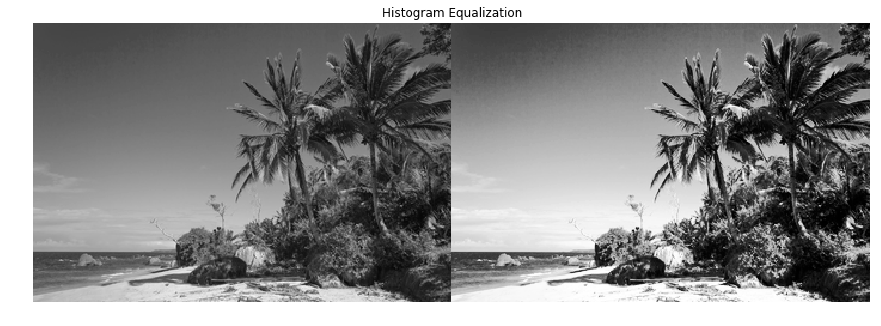

In [5]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eq = cv2.equalizeHist(img)



plt.figure(figsize=(15,10))


plt.imshow(np.hstack([img,eq]), cmap='gray')
plt.title('Histogram Equalization')
plt.axis("off")
plt.show()


### Histograms and Masks

In [6]:

def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ('r', 'g', 'b')
    plt.figure()
    plt.title(title)
    plt.xlabel('Bins')
    plt.ylabel('# of Pixels')
    
    for (chan, color) in zip (chans, colors):
        hist = cv2.calcHist([chan], [0], mask, [256], [0,256])
        plt.plot(hist, color = color)
        plt.xlim([0,256])
        

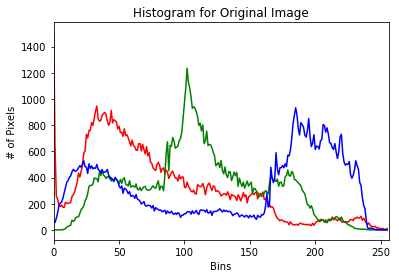

In [7]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plot_histogram(img,'Histogram for Original Image')
plt.show()

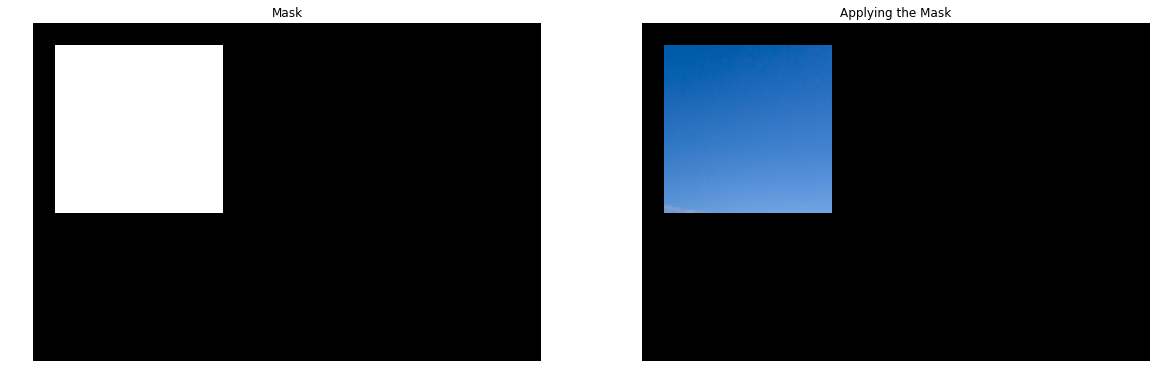

In [8]:
img = cv2.imread('images/beach.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2], dtype='uint8')
cv2.rectangle(mask, (15,15), (130,130), 255, -1)

masked = cv2.bitwise_and(img, img, mask=mask)


plt.figure(figsize=(20,10))

plt.subplot(1,2,1), plt.imshow(mask, cmap='gray')
plt.title('Mask'),plt.axis("off")

plt.subplot(1,2,2), plt.imshow(masked, cmap='gray')
plt.title('Applying the Mask'),plt.axis("off")

plt.show()

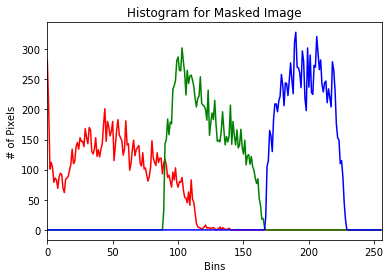

In [9]:
plot_histogram(img, "Histogram for Masked Image", mask = mask)
plt.show()
# bit wrong...